# Evaluate False Detections

In [1]:
from biblical_scripts.pipelines.reporting.nodes import _filter_to_certain_chapters
dfm = catalog.load('probs')
chapters_to_report = catalog.load('chapters_to_report')

params = catalog.load('parameters')['report']

if not chapters_to_report.empty:
    dfm = _filter_to_certain_chapters(dfm, chapters_to_report)

dfm.loc[:, 'sig_t'] = dfm['t_pval'] < params['sig_level']
dfm.loc[:, 'sig_rank'] = dfm['rank_pval'] < params['sig_level']

dfr = dfm[dfm.author == dfm.corpus]
dfr[dfr.author.isin(params['known_authors'])]\
.groupby(['variable'])\
.mean()\
.filter(['sig_t', 'sig_rank'])\
.rename(columns={'sig_t' : 'FNR-t', 'sig_rank' : 'FNR-rank'})

2021-12-07 13:16:55,912 - kedro.io.data_catalog - INFO - Loading data from `probs` (CSVDataSet)...
2021-12-07 13:16:55,925 - kedro.io.data_catalog - INFO - Loading data from `chapters_to_report` (CSVDataSet)...
2021-12-07 13:16:55,928 - kedro.io.data_catalog - INFO - Loading data from `parameters` (MemoryDataSet)...
2021-12-07 13:16:55,934 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
2021-12-07 13:16:55,940 - root - INFO - Reporting on the reduced list of 50 chapters


,FNR-t,FNR-rank
variable,,
HC,0.02,0.0


In [2]:
dfr = dfm[(dfm.author == dfm.corpus)]
dfr[dfr.author.isin(params['known_authors'])]\
.groupby(['variable'])\
.mean()\
.filter(['sig_t', 'sig_rank'])\
.rename(columns={'sig_t' : 'FNR-t', 'sig_rank' : 'FNR-rank'})

,FNR-t,FNR-rank
variable,,
HC,0.02,0.0


In [4]:
dfm[(dfm.author == "P") & (dfm.corpus == "Dtr")].sig_rank.mean()

0.0

In [7]:
dfm.rank_pval

12     0.733333
13     0.562500
14     0.394737
15     0.866667
16     0.437500
         ...   
280    0.062500
281    0.756757
282    0.062500
283    0.062500
284    0.621622
Name: rank_pval, Length: 150, dtype: float64

In [80]:
dfm

,author,doc_id,len,variable,value,doc_tested,itr,smp_len,kind,len_doc_tested,...,"('value', 'mean')","('value', 'std')","('value', 'count')","('value', 'CI05')","('value', 'CI95')",rank_pval,t-score,t_pval,sig_t,sig_rank
12,Dtr,Deut.10 by Dtr,530.0,HC,0.853181,Deut.10 by Dtr,0,530,generic,530,...,1.169424,1.447198,14,-1.379194,2.402472,0.733333,0.074514,0.470868,False,False
13,Dtr,Deut.10 by Dtr,530.0,HC,1.678682,Deut.10 by Dtr,0,530,generic,530,...,2.102621,0.929893,15,1.032536,3.615467,0.562500,-0.505790,0.689563,False,False
14,Dtr,Deut.10 by Dtr,530.0,HC,3.619981,Deut.10 by Dtr,0,530,generic,530,...,3.283661,1.156103,37,1.151222,5.054994,0.394737,0.818340,0.209273,False,False
15,Dtr,Deut.11 by Dtr,837.0,HC,-1.280020,Deut.11 by Dtr,0,837,generic,837,...,1.169424,1.447198,14,-1.379194,2.402472,0.866667,-2.058687,0.969927,False,False
16,Dtr,Deut.11 by Dtr,837.0,HC,2.239180,Deut.11 by Dtr,0,837,generic,837,...,2.125926,0.987452,15,0.811236,3.602174,0.437500,0.159241,0.437877,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,P,Lev.8 by P,902.0,HC,6.331965,Lev.8 by P,0,902,generic,902,...,2.424461,1.433551,15,1.101784,4.895318,0.062500,4.698084,0.000171,True,False
281,P,Lev.8 by P,902.0,HC,2.534615,Lev.8 by P,0,902,generic,902,...,3.230276,1.188189,36,1.234665,5.051483,0.756757,-0.146015,0.557626,False,False
282,P,Lev.9 by P,527.0,HC,4.507026,Lev.9 by P,0,527,generic,527,...,1.498208,1.475372,15,-0.940308,3.066739,0.062500,3.525981,0.001679,True,False
283,P,Lev.9 by P,527.0,HC,4.307213,Lev.9 by P,0,527,generic,527,...,2.277328,1.028208,15,1.244332,3.981234,0.062500,2.167462,0.023965,True,False


# Distributed

### To Do:
 - Use cross-val pipeline
 - Correct sim_full so that doc-corp comparison is based all data (for the case that we apply feature reduction)

# Text Processing

In [105]:
data = ctx.catalog.load('oshb_parsed')

2021-04-26 16:19:41,178 - kedro.io.data_catalog - INFO - Loading data from `oshb_parsed` (CSVDataSet)...


# Accuracy

In [106]:
probs = ctx.catalog.load('probs')
probs['author'] = probs.doc_tested.str.extract(r"by ([a-zA-Z0-9 ]+)")

probs['author'] = probs.doc_tested.str.extract(r"by ([a-zA-Z0-9 ]+)")


2021-04-26 16:19:42,389 - kedro.io.data_catalog - INFO - Loading data from `probs` (CSVDataSet)...


In [107]:
df = probs[probs.variable == 'HC'][probs.author.isin(['P', 'Dtr', 'DtrH'])]

(0.0, 0.2)

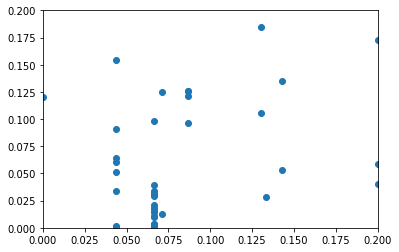

In [109]:
from matplotlib import pyplot as plt
plt.scatter(df['prob'], df['t-test'])
plt.xlim((0,.2))
plt.ylim((0,.2))

In [104]:
df = sim_res.copy().rename(columns={'true_author' : 'author'})
df['corpus'] = sim_res['variable'].str.extract(r'([^:]+):')


res_tbl = df.pivot('corpus','doc','value')
lo_corpora = df.corpus.unique().tolist()
cmin = res_tbl.idxmin().rename('min_corpus')
res_tbl = res_tbl.append(cmin)
res_tbl.loc['author', :] = [r[1] for r in res_tbl.columns.str.split(' by ')]
res_tbl.loc['succ', :] = res_tbl.loc['min_corpus',:] == res_tbl.loc['author',:]

res_tbl['mean'] = rp.loc[lo_corpora + ['succ'],:].mean(1)
res_tbl

NameError: name 'sim_res' is not defined

# Conversion

In [110]:
data = ctx.catalog.load('oshb_parsed')
from biblical_scripts.extras.Convert import Convert
convert = Convert(data)

2021-04-26 16:21:25,783 - kedro.io.data_catalog - INFO - Loading data from `oshb_parsed` (CSVDataSet)...


In [111]:
convert.to_term('s')

's'

In [113]:
data[data.lemma.str.contains("s/")]

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,chapter,lemma,morph,term,verse,author
22089,1Chr.27,s/b/3754,HTr/Rd/Ncbpa,שֶׁ/בַּ/כְּרָמִים֙,1Chr.27.27,Chr1
37851,Judg.6,s/859 a,HTr/Pp2ms,שָׁ/אַתָּ֖ה,Judg.6.17,DtrH


In [939]:
vocab = pd.read_csv("/Users/kipnisal/DS/BiblicalScripts/bib-scripts/data/05_model_input/vocabulary.csv")

In [1025]:
from sklearn.model_selection import KFold

In [961]:
vocab.loc[1,'feature']

"('c', '<Np>')"

# Sim full  

In [127]:
sim_full_res_large = pd.read_csv(project_dir + "/data/07_sim_output/sim_full_res_large.csv")

In [524]:
sim_full_res = cnx.catalog.load("sim_full_res")
print("len res = ",len(sim_full_res))

2021-04-19 13:07:24,380 - kedro.io.data_catalog - INFO - Loading data from `sim_full_res` (CSVDataSet)...
len res =  6342


## Results:

In [511]:
import plotnine
plotnine.options.figure_size = (10, 6)
from plotnine import *
logging.basicConfig(level=logging.INFO)

In [512]:
from biblical_scripts.pipelines.report.nodes import (_prepare_res, report_table_full,
                                                     report_sim)


In [649]:
def _arrange_metadata(df, value) :
    """
    adds 'corpus' and 'author' column to evaluation results
    """
    
    df = df[df.variable.str.contains(value)]
    df.loc[:,'corpus'] = sim_full_res.variable.str.extract(rf"(^[A-Za-z0-9 ]+)(-ext)?:([A-Za-z]+)")[0]
    df.loc[:,'author'] = df.doc_tested.str.extract(r"by (.+)")[0]
    return df


In [657]:
def _comp_probs(sim_full_res : pd.DataFrame, by) -> pd.DataFrame :
    """
    mean, std and CI's over many iterations.
    """
    
    df.loc[:,'rank'] = np.floor(df.groupby(by)['value'].transform('rank'))

    df0 = df[df.kind == 'org']
    df1 = df[df.kind != 'org']

    #df1['corpus'] = df1['corpus'].str.extract(r'([A-Za-z0-9 ]+)-ext')[0]
    grp = df1.groupby(by)
    res = grp.agg({value : ['mean', 'std', 'count', 
                               lambda x : pd.Series.quantile(x, q=.05),
                               lambda x : pd.Series.quantile(x, q=.95)
                              ]}, as_index=False).reset_index()\
        .rename(columns = {'<lambda_0>' : 'CI05', '<lambda_1>' : 'CI95'})

    dfm = df0.merge(res[['doc_tested', 'corpus', 'value']],
                      on=['doc_tested', 'corpus'], how='right')

    mu = dfm[(value, 'mean')]
    std = dfm[(value ,'std')]
    n = dfm[(value, 'count')]

    dfm.loc[:,'prob'] = 1 - (np.floor(dfm['rank'])-1) / n
    dfm.loc[:,'t-score'] = np.abs(dfm[value] - mu) / (std * np.sqrt(n/(n-1)))
    dfm.loc[:,'t-test'] = scipy.stats.t.sf(dfm['t-score'], df=n-1)
    return dfm

def comp_probs(sim_full_res, params_report) :
    df = _arrange_metadata(sim_full_res, value=params_report['value'])
    dfm = _comp_probs(df, by = ['author', 'doc_tested', 'corpus'])
    return dfm
    
def report_probs(dfm)
    return dfm.pivot('corpus', 'doc_tested', ['value', 'prob', 't-test', 'rank', 't-score'])

In [671]:
res = comp_probs(sim_full_res, params_report = params['report'])
res.to_csv('temp.csv')

/usr/local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
/usr/local/lib/python3.8/site-packages/pandas/core/generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


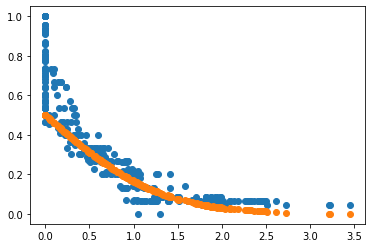

In [656]:
plt.scatter(dfm['t-score'], dfm['prob'])
plt.scatter(dfm['t-score'], dfm['t-test'])
plt.show()

/usr/local/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/usr/local/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/usr/local/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/usr/local/lib/python3.8/site-packages/plotnine/guides/guide_legend.py:302: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr

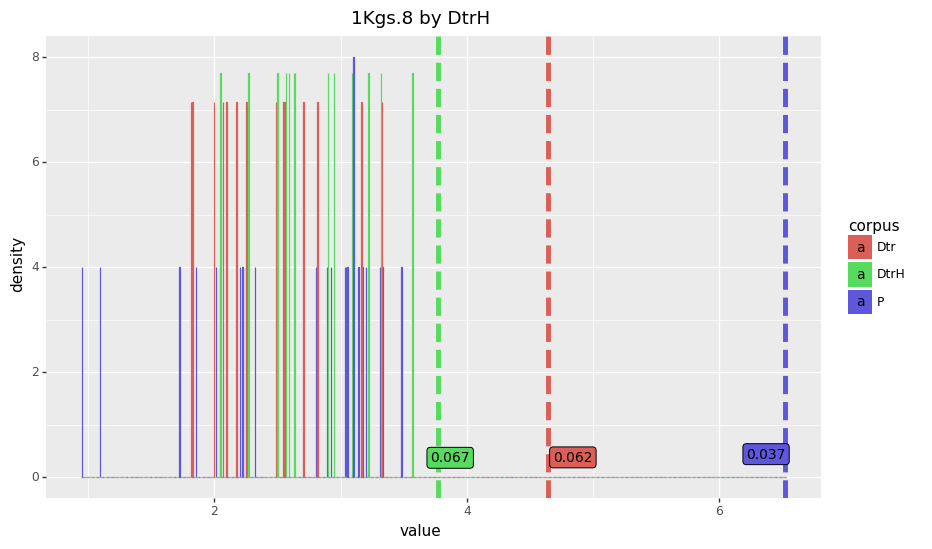

<ggplot: (343879762)>


In [1537]:
p = (ggplot(aes(x='value', fill = 'corpus', y='..density..',
            color='corpus', label='corpus'), data = res1_null)
         + geom_histogram(alpha=0.3,position='dodge', binwidth=.01) 
         #+ geom_density(alpha = 0.5)
         + geom_vline(aes(xintercept='value', color='corpus'),
                      data=res1_doc, size=2, linetype='dashed')
         + geom_label(data=res1_doc,
                          mapping=aes(x='value', y=0.5, label='prob', fill='corpus'),
                          position=position_jitter(),
                          size=10, colour = "black")
         + ggtitle('{}'.format(doc_nm)) )

#p.save('./Figs/simulated_null_{}_NG{}_temp.png'.format(auth,NG_RANGE))
print(p)


# Models

In [1092]:
data_proc = pd.read_csv(path + '/' + 'data/04_feature/data_proc.csv')

In [880]:
import pandas as pd
import numpy as np
import logging
%reload_ext autoreload
from biblical_scripts.pipelines.data_science.AuthorshipAttribution.AuthAttLib import AuthorshipAttributionDTM
from biblical_scripts.pipelines.data_science.AuthorshipAttribution.MultiDoc import CompareDocs
from biblical_scripts.pipelines.data_science.nodes import (build_vocab, compute_sim)
#%load_ext autoreload
#%autoreload 2

data_raw = pd.read_csv(path + '/' + 'data/02_intermediate/oshd_parsed.csv')
data_proc = pd.read_csv(path + '/' + 'data/04_feature/data_proc.csv')
#vocab = pd.read_csv(path + '/' + 'data/05_model_input/vocabulary.csv')
vocab = build_vocab(data_proc, parameters['vocab'], parameters['known_authors'])

INFO:root:Constructed vocabulary with 960 features


In [878]:
def compute_sim(data, vocabulary, params, known_authors) :
    ds = data.rename(columns = {'feature' : 'term', 'chapter' : 'doc_id'}).dropna()
    model = AuthorshipAttributionDTM(ds, params, vocab=listb(vocabulary.feature.values))
    return model.compute_inter_similarity(LOO = True, wrt_authors=known_authors)

In [ ]:
params = {}; [params.update(p) for p in parameters['model']]

md = CompareDocs(vocabulary=vocab.feature.tolist())
#ds=data_proc[['author', 'feature', 'token_id']].groupby(['author', 'feature']).count().reset_index()
ds=data_proc[['author', 'feature', 'token_id', 'chapter']]
ds=ds.rename(columns = {'chapter' : 'doc_id'})
ds['doc_id'] += ' by '
ds['doc_id'] += ds['author'] #sometimes there are multiple authors per chapter
    
known_authors = parameters['known_authors']
train_data = {}
for auth in known_authors :
    train_data[auth] = ds[ds.author==auth]

md.fit(train_data)
df_res1 = pd.DataFrame()
for doc_id in ds.doc_id.unique() :
    tested_doc = ds[ds.doc_id==doc_id]
    auth = tested_doc.author.values[0]
    df_rec = md.test_doc(tested_doc, of_cls = auth)
    r = df_rec.iloc[:,df_rec.columns.str.contains(r'HC|Fisher|chisq')].mean()
    r['doc_id'] = doc_id
    r['author'] = auth
    r['len'] = len(tested_doc)
    df_res1 = df_res1.append(r, ignore_index=True)

In [932]:
df = df_res1.melt(['author', 'doc_id', 'len'])

def _eval_succ(df) :
    df['wrt_author'] = df['variable'].str.extract(r'([^:]+):')
    idx_min = df.groupby(['doc_id', 'author'])['value'].idxmin()
    res_min = df.loc[idx_min, :].rename(columns={'wrt_author' : 'most_sim'})
    res_min.loc[:, 'succ'] = res_min.author == res_min.most_sim
    return res_min

value = report_params['value']
df1 = df[df['variable'].str.contains(f":{value}")]
df1 = df1[df1.author.isin(known_authors)].reset_index()

res = _eval_succ(df1)
res['acc'] = res.succ.mean()
res['param'] = str(parameters)

In [935]:
ds = pd.read_csv("../data/05_model_input/vocabulary.csv")
ds[~ds.feature.str.contains(r"\[[a-zA-Z0-9]+\]")]

,feature
0,103
1,1086
2,1104
3,1115
4,1129
...,...
636,8484
637,8519
638,8535
639,887


In [876]:
data_raw[data_raw.chapter == '2Kgs.23']

array(['21, 2 Kings 23 :21-30', 'DtrH'], dtype=object)